In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import seaborn as sns
from matplotlib import pyplot as plt

In [23]:
file_path = r"D:\Churn Analysis\Data\Predict_Data.xlsx"
sheet_name = 'vw_ChurnDATA'

data = pd.read_excel(file_path, sheet_name=sheet_name)

print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11850-MAH    Male   74     Yes     Maharashtra                    5   
1   11873-HAR    Male   45     Yes         Haryana                    9   
2   11878-RAJ    Male   75     Yes       Rajasthan                   15   
3   11882-BIH  Female   74      No           Bihar                   14   
4   11887-MAD  Female   33      No  Madhya Pradesh                    2   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 6        NaN           Yes            Yes  ...   
1                10     Deal 2           Yes             No  ...   
2                17        NaN           Yes             No  ...   
3                15     Deal 5           Yes             No  ...   
4                33     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card      75.150002   3480.350098           0.0   
1      Cre

In [18]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


columns_to_encode =[
        'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]


label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])


data['Customer_Status'] = data['Customer_Status'].map({'Stayed' :0, 'Churned' : 1})

X= data.drop('Customer_Status', axis=1)
y= data['Customer_Status']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    

In [19]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[796  59]
 [121 226]]

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       855
           1       0.79      0.65      0.72       347

    accuracy                           0.85      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.85      0.85      0.85      1202



<function matplotlib.pyplot.show(close=None, block=None)>

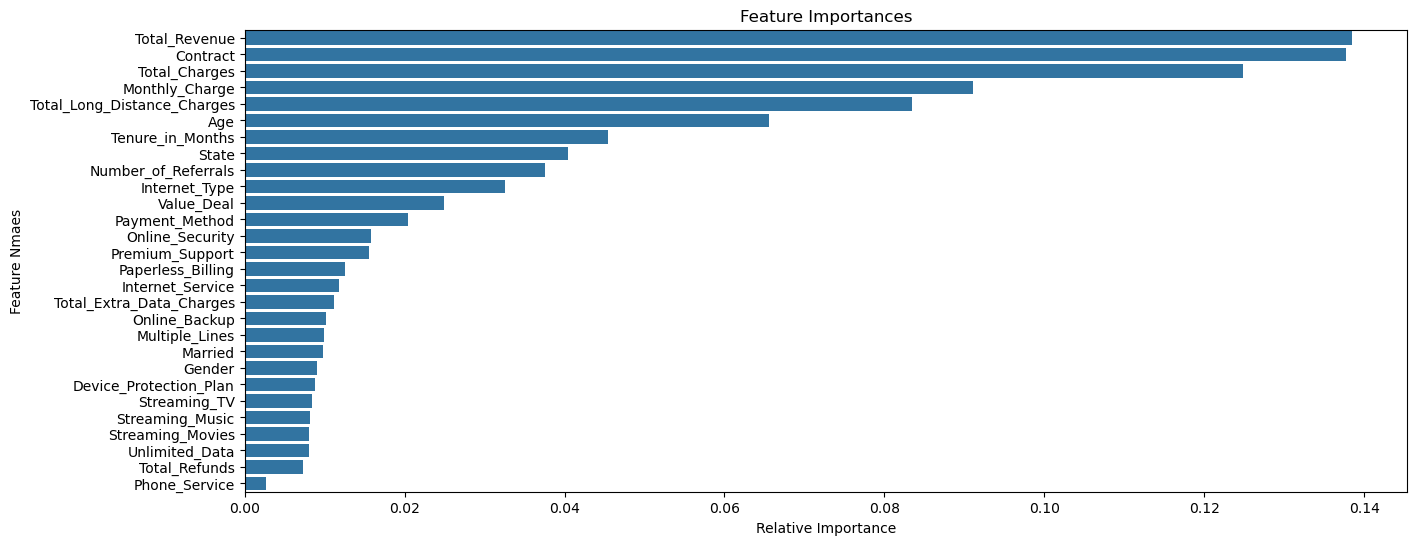

In [29]:
y_pred = rf_model.predict(X_test)


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report")
print(classification_report(y_test, y_pred))


importances =rf_model.feature_importances_
indicies = np.argsort(importances)[::-1]


plt.figure(figsize=(15,6))
sns.barplot(x=importances[indicies], y=X.columns[indicies])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Nmaes')
plt.show

In [51]:
file_path = r"D:\Churn Analysis\Data\Predict_Data.xlsx"
sheet_name = 'vw_JoinData'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

print(new_data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   15349-UTT    Male   47     Yes   Uttar Pradesh                    9   
1   16032-AND  Female   47      No  Andhra Pradesh                    8   
2   16068-BIH  Female   44     Yes           Bihar                    4   
3   16244-UTT  Female   19     Yes   Uttar Pradesh                    5   
4   17796-BIH  Female   65      No           Bihar                    5   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                12     Deal 5           Yes            Yes  ...   
1                18        NaN           Yes             No  ...   
2                25     Deal 5            No             No  ...   
3                 7        NaN           Yes             No  ...   
4                 1        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      50.150002     50.150002           0.0   
1  Bank Wi

In [52]:
original_data = new_data.copy()

customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID', 'Customer_Status','Churn_Category', 'Churn_Reason'], axis=1)


for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoder[column].transform(new_data[column])


new_predictions= rf_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

original_data = original_data[original_data['Customer_Status_Predicted'] ==1]

original_data.to_csv(r"D:\Churn Analysis\Data\original_data.csv")